In [2]:
# Import matplotlib and numpy
import matplotlib.pyplot as plt
import numpy as np

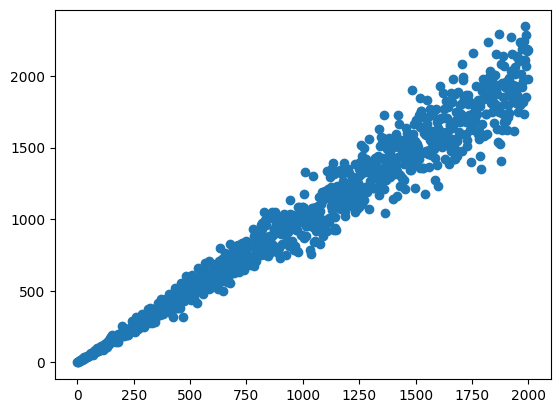

In [3]:
# Define the number of bins
num_bins = 20

# maxn
maxn = 2000

# Generate random data with linear trend
x = np.linspace(0, maxn, 1000)
y = x + np.random.normal(loc=0, scale=0.5 + 0.1 * x, size=len(x))

# Plot the data
plt.plot(x, y, 'o')


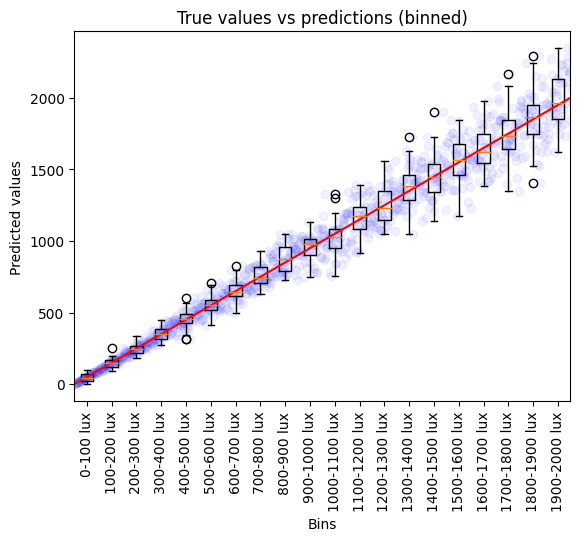

In [5]:
# Create a boxplot binned in 10 bins by x value

# Bin the data
bins = np.linspace(min(x), maxn, num_bins + 1)
digitized = np.digitize(x, bins)

# Create a dictionary to store the y values for each bin
bin_values = {i: [] for i in range(1, num_bins + 1)}

# Populate the dictionary with corresponding y values
for i in range(len(x)-1):
    bin_values[digitized[i]].append(y[i])

# Create subplots with shared x-axis
fig, ax1 = plt.subplots()

# Create scatter plot for x and y
ax1.scatter(x/max(x)*num_bins, y, color='blue', label='Scatterplot', alpha=0.05)

# Plot boxplots for each bin
positions = np.arange(1, num_bins + 1) - 0.5  # Shift by half of the box width
ax1.boxplot(bin_values.values(), labels=[f'{((i-1)*maxn)//num_bins}-{i*maxn//num_bins} lux' for i in range(1, num_bins + 1)], positions=positions)
ax1.set_xlabel('Bins')
ax1.set_ylabel('Predicted values')
ax1.set_title('True values vs predictions (binned)')

# Turn the labels to 45 degrees
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)


# Add a line showing the linear trend
ax1.plot(x/max(x)*num_bins, x, color='red', label='Linear trend')


# Show the plot
plt.show()